In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, r2_score

In [3]:
data_csv_fname = "../data/finalized_bzfd_data.csv"
bzfd_df = pd.read_csv(data_csv_fname, sep=',', index_col=0)

Y = bzfd_df['viralIndicator']
X = bzfd_df.iloc[:,20:-1]

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=519)

In [4]:
def fitted_rfc(params):
    rfc = RandomForestClassifier(**params)
    fitted_rfc = rfc.fit(X_train, Y_train)
    return fitted_rfc

def ClassifierMetrics (X_train, Y_train, X_test, Y_test, fitted_model):
    Y_pred = fitted_model.predict_proba(X_test)[:,1]
    train_accuracy = fitted_model.score(X_train, Y_train)
    test_accuracy = fitted_model.score(X_test, Y_test)
    test_auc = roc_auc_score(Y_test, Y_pred)
    test_r2 = r2_score(Y_test, Y_pred)
    return train_accuracy, test_accuracy, test_auc, test_r2

In [6]:
init_rfc_model_params = {'n_estimators':[],'min_samples_split':[],'train_accuracy':[],'test_accuracy':[],'test_auc':[], 'test_r2':[]}
estimators = [ 100,  115, 120, 125]
for i in estimators:
    print(i)
    for j in range(2,50):
            params = {'criterion': 'entropy',
                      'n_estimators': i,
                      'random_state':519,
                      'min_samples_split': j,}
            
            fitted_model = fitted_rfc(params)
            init_rfc_model_params['n_estimators'].append(i)
            init_rfc_model_params['min_samples_split'].append(j)
            train_accuracy, test_accuracy, test_auc, test_r2 = ClassifierMetrics(X_train, Y_train, X_test, Y_test, fitted_model)
            init_rfc_model_params['train_accuracy'].append(train_accuracy)
            init_rfc_model_params['test_accuracy'].append(test_accuracy)
            init_rfc_model_params['test_auc'].append(test_auc)
            init_rfc_model_params['test_r2'].append(test_r2)

100
115
120
125


In [7]:
init_rfc_pd = pd.DataFrame(init_rfc_model_params)

In [12]:
n_colors = len(init_rfc_pd['n_estimators'].unique())
reds = sns.cubehelix_palette(n_colors, start=1, rot=-.1)

Text(0.5, 1.0, 'Model Accuracy by \nmin_samples_split & n_estimators')

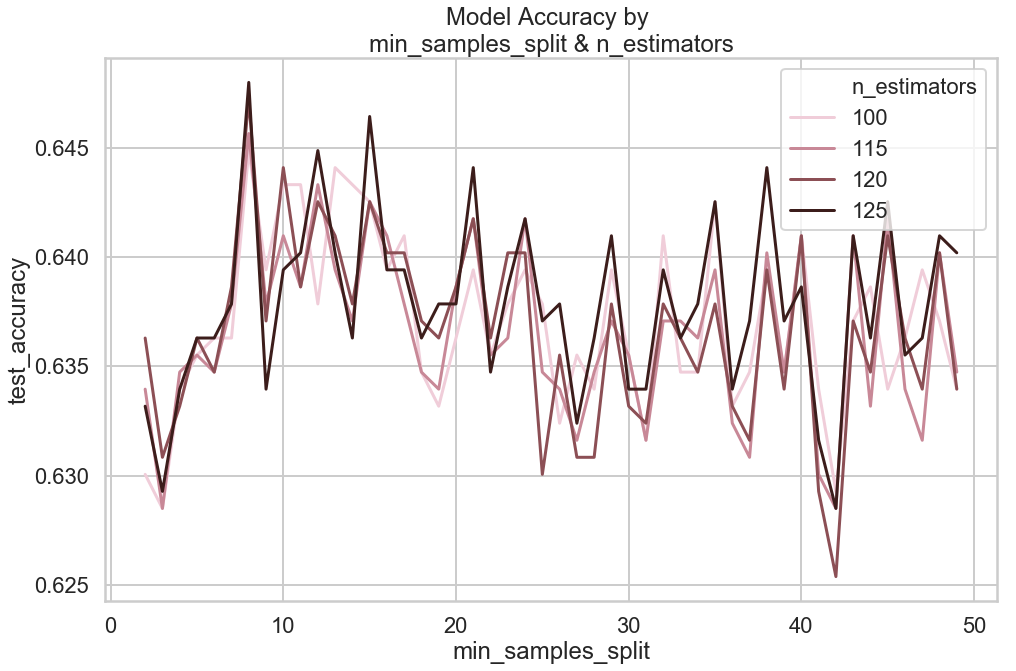

In [15]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16, 10))

sns.lineplot(x='min_samples_split', y='test_accuracy', hue='n_estimators', palette = reds , data = init_rfc_pd  )\
.set_title('Model Accuracy by \nmin_samples_split & n_estimators')

Text(0.5, 1.0, 'Model AUC by \nmin_samples_split & n_estimators')

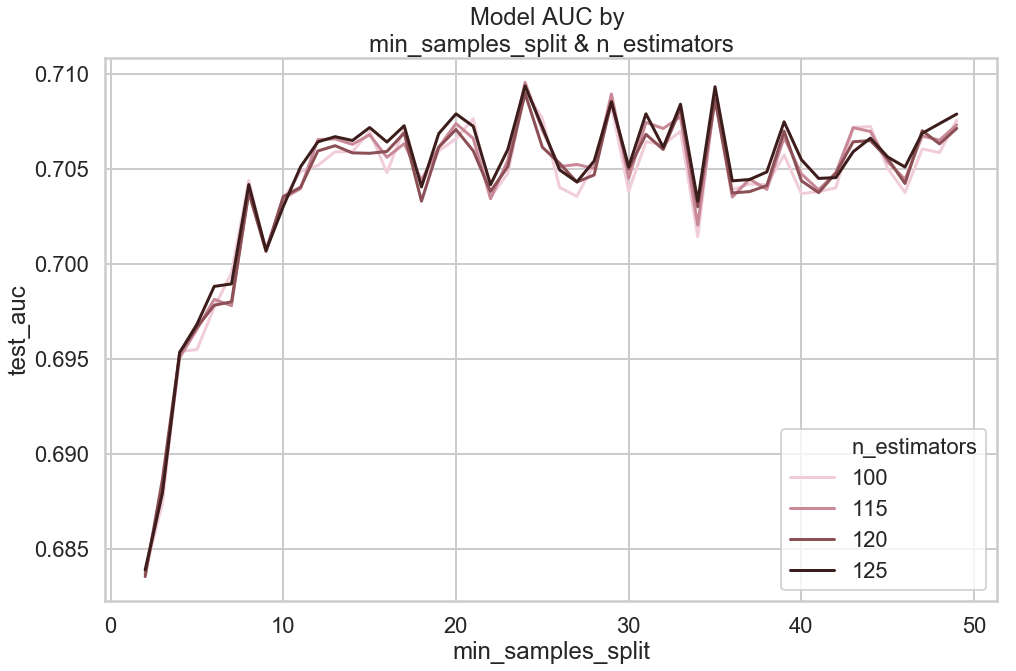

In [17]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16, 10))

sns.lineplot(x='min_samples_split', y='test_auc', hue='n_estimators', palette = reds , data = init_rfc_pd  )\
.set_title('Model AUC by \nmin_samples_split & n_estimators')

In [19]:
# auc_max_r2 = init_rfc_pd[(rfc_pd['test_auc']==rfc_pd['test_auc'].max())]['test_r2'].max()
auc_max_acc = init_rfc_pd[(init_rfc_pd['test_auc']==init_rfc_pd['test_auc'].max())]['test_accuracy'].max()
init_rfc_pd[(init_rfc_pd['test_auc']==init_rfc_pd['test_auc'].max())]

,n_estimators,min_samples_split,train_accuracy,test_accuracy,test_auc,test_r2
70,115,24,0.797429,0.641745,0.709562,0.132551
